<a href="https://colab.research.google.com/github/ardra1111/Diabetes-Predictor/blob/main/Diabetes_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Diabetes Predictor**



Diabetes is a chronic condition that affects how your body turns food into energy. There are three main types of diabetes: type 1, type 2, and gestational diabetes.

- **Type 1 diabetes** occurs when your immune system mistakenly attacks and destroys the insulin-producing cells in your pancreas. This type of diabetes is typically diagnosed in children and young adults.

- **Type 2 diabetes** occurs when your body becomes resistant to insulin or doesn't produce enough insulin. This type of diabetes is more common and is often associated with lifestyle factors such as obesity, unhealthy diet, and lack of physical activity.

- **Gestational diabetes** develops during pregnancy and usually goes away after giving birth. However, women who have had gestational diabetes have a higher risk of developing type 2 diabetes later in life.

Diabetes is diagnosed based on blood sugar levels. A fasting blood sugar level of 126 milligrams per deciliter (mg/dL) or higher on two separate tests indicates diabetes.

The diabetes predictor model utilizes machine learning algorithms to analyze various factors such as age, BMI, blood pressure, and genetic predisposition to predict the likelihood of an individual developing diabetes. By inputting relevant information into the model, individuals can gain insights into their risk of diabetes and take preventive measures such as adopting a healthier lifestyle, monitoring blood sugar levels, and seeking medical advice.

This model serves as a valuable tool in disease prevention and management by empowering individuals to make informed decisions about their health and well-being.


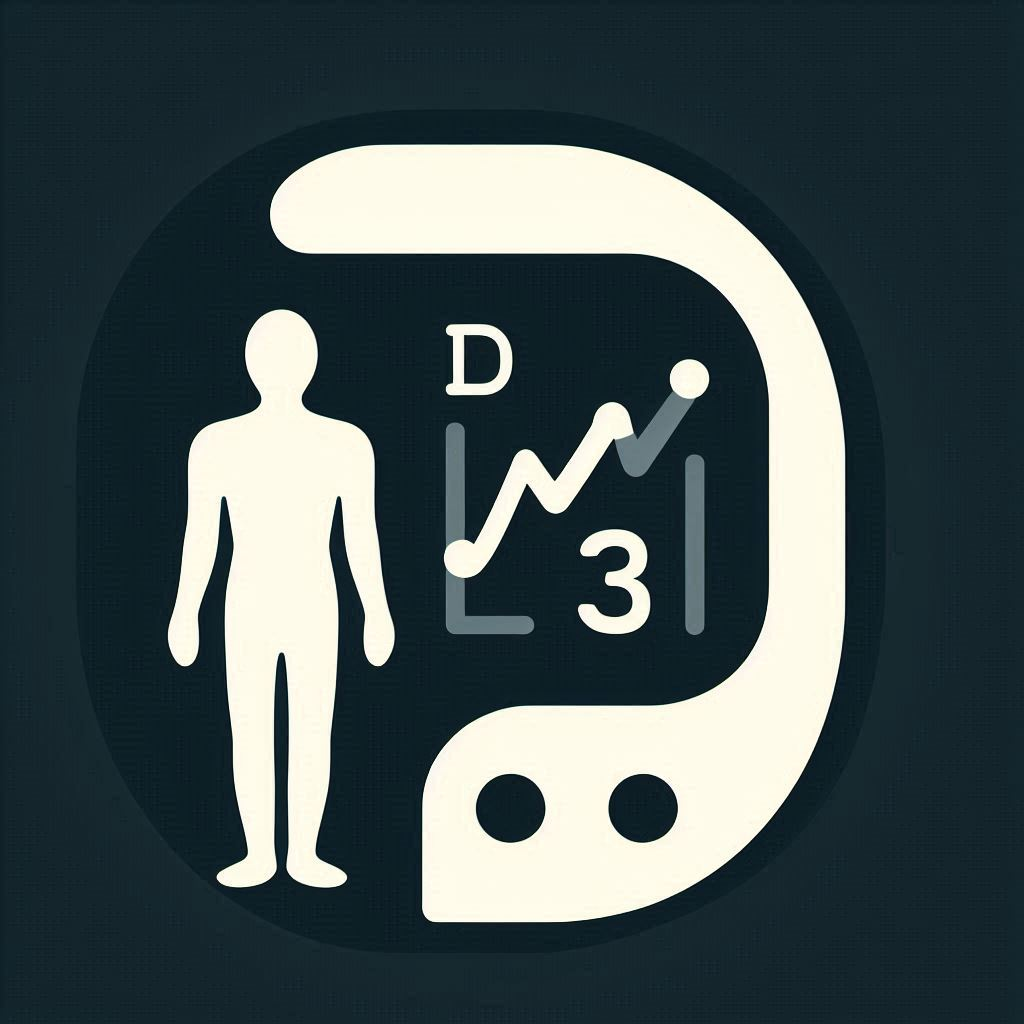

#**Using Pima Indians Diabetes Database**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ardra1111","key":"37d20ba8d54c672e60004d474d1ebeed"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
%cd /content/kaggle.json

[Errno 20] Not a directory: '/content/kaggle.json'
/content


In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 17.4MB/s]


In [ ]:
!unzip /content/pima-indians-diabetes-database

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


##**UNDERSTANDING THE DATA**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##**VISUALIZATION OF THE DATA**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

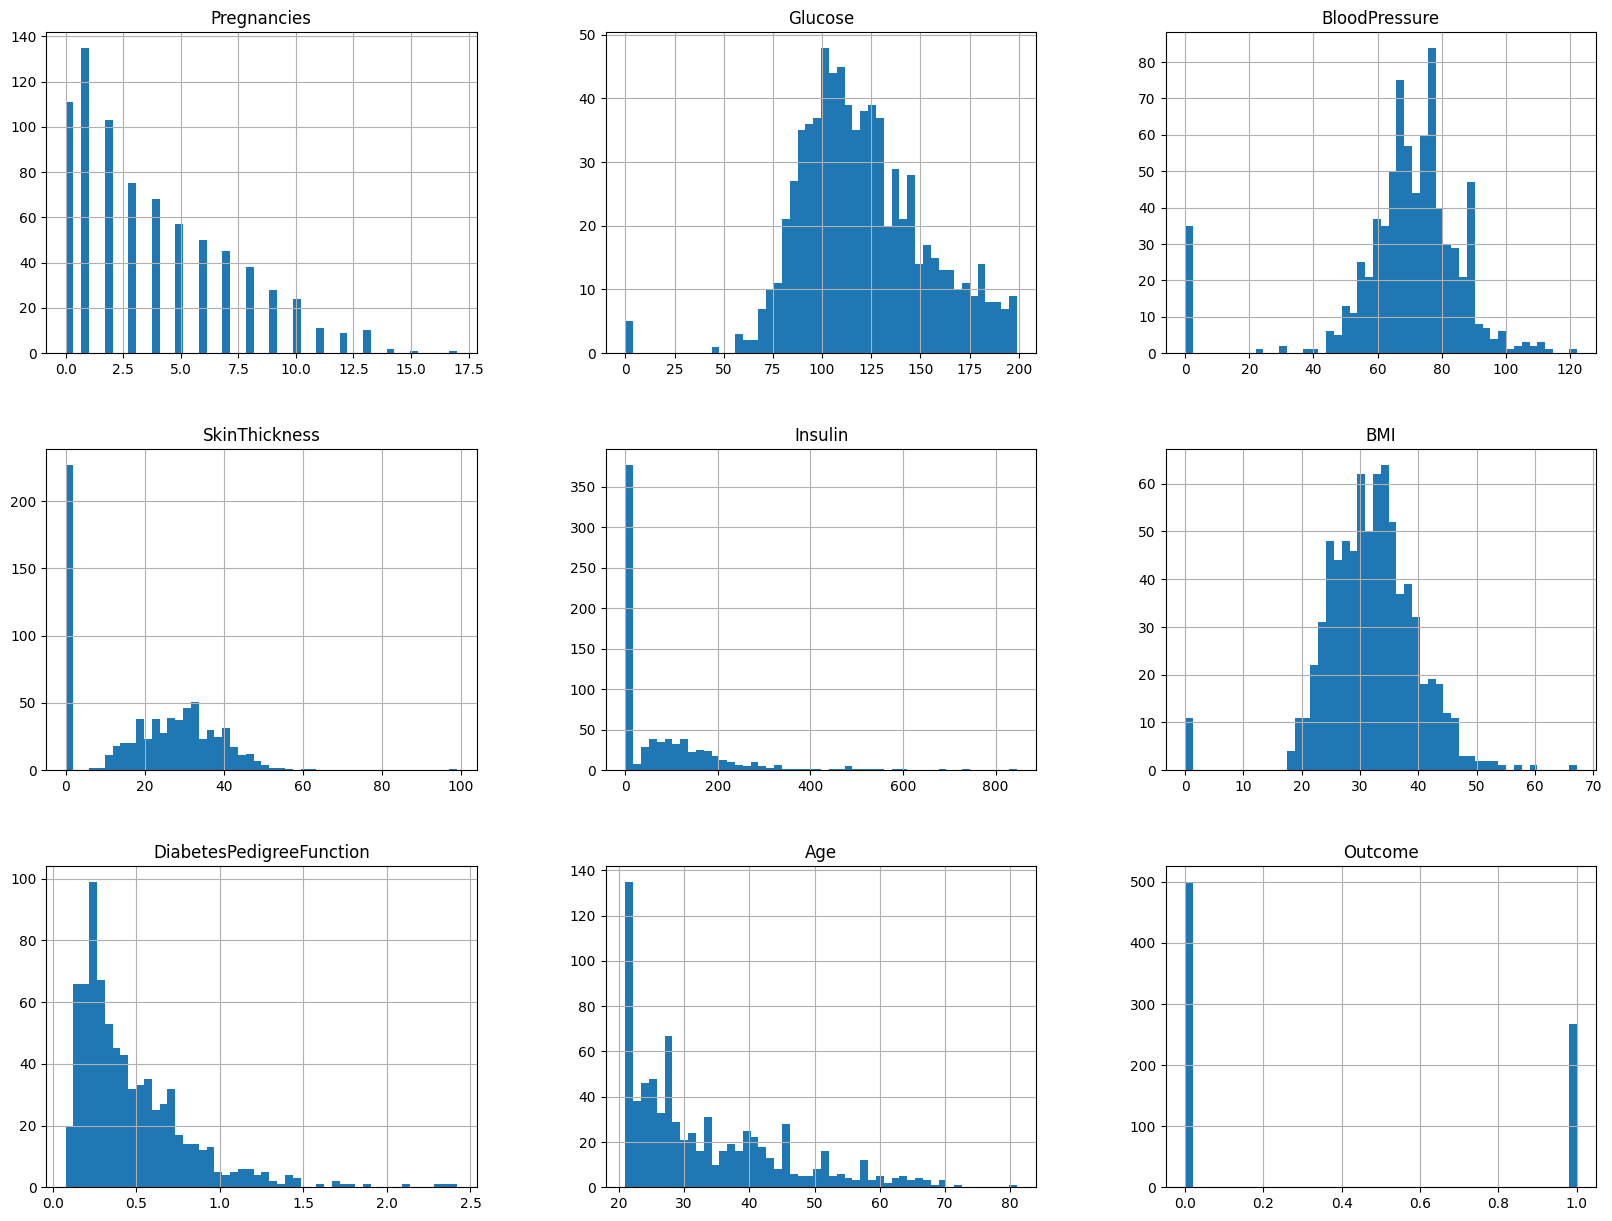

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

([<matplotlib.patches.Wedge at 0x7e786e485fc0>,
 [Text(-0.5025943242672991, 0.9784676515931925, '0'),
  Text(0.5025944158780503, -0.9784676045369114, '1')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.10'),
  Text(0.2741424086607547, -0.5337096024746789, '34.90')])

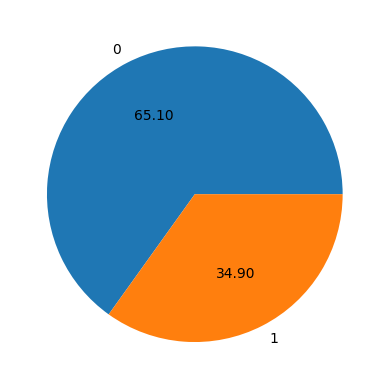

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Outcome'].value_counts(),labels=['0','1'],autopct="%0.2f")

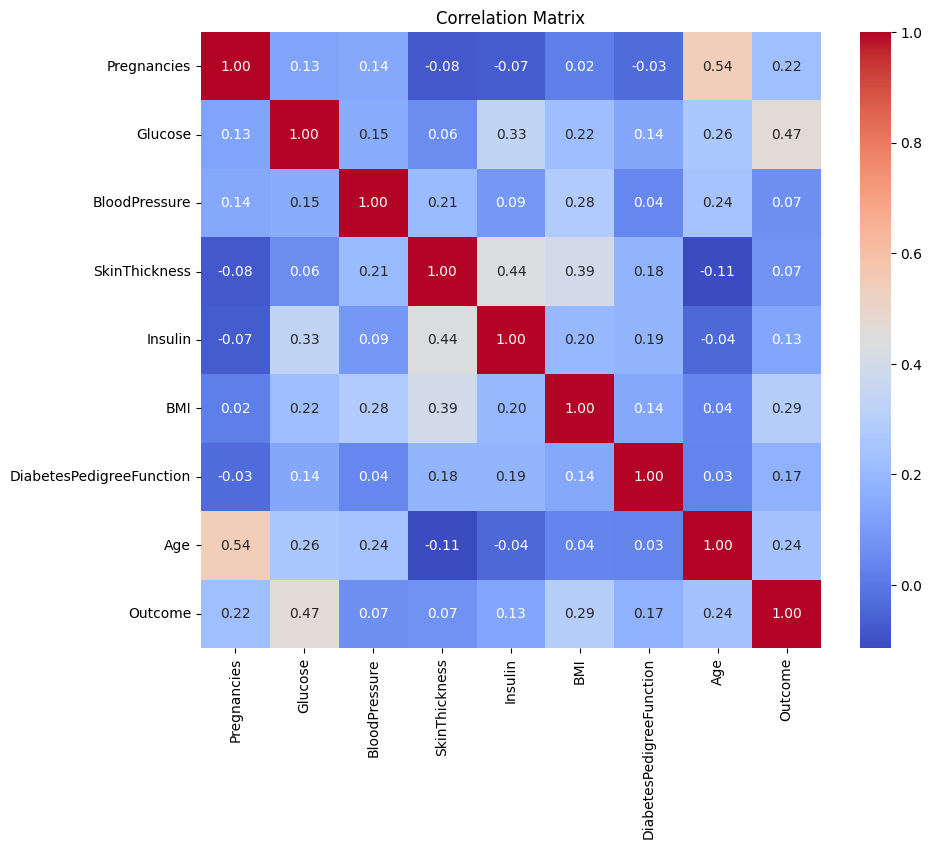

In [ ]:
import pandas as pd
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


##**TRAIN - TEST SPLITTING**


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score

# Feature engineering - create new features
df['BMI_Obesity'] = (df['BMI'] >= 30).astype(int)
df['High_BloodPressure'] = (df['BloodPressure'] > 80).astype(int)

# Separate the features and the target variable
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Combine X and y for cross-validation
data = np.hstack((X, y))
print(f"Train data distribution: {np.bincount(y_train.flatten())}")
print(f"Test data distribution: {np.bincount(y_test.flatten())}")

Train data distribution: [401 213]
Test data distribution: [99 55]



- **Importing Libraries:**
  - *`Importing NumPy`*: NumPy is imported as `np` for numerical operations.
  - *`Importing train_test_split and KFold`*: Functions from scikit-learn for data splitting and cross-validation are imported.
  - *`Importing accuracy_score`*: Function for evaluating model performance is imported.

- **Feature Engineering:**
  - *`Creating BMI_Obesity Feature`*: A new feature 'BMI_Obesity' is created based on BMI values, indicating obesity.
  - *`Creating High_BloodPressure Feature`*: Another feature 'High_BloodPressure' is created based on Blood Pressure values.

- **Data Splitting:**
  - *`Splitting into Training and Testing Sets`*: The dataset is divided into training and testing sets, with 80% for training and 20% for testing.

- **Cross-Validation Setup:**
  - *`Defining Number of Folds`*: The number of folds for cross-validation is set to 5.
  - *`Creating KFold Object`*: KFold object is initialized with shuffling and a specific random state for cross-validation.

- **Data Distribution Check:**
  - *`Checking Train Data Distribution`*: Displaying the distribution of classes in the training data.
  - *`Checking Test Data Distribution`*: Displaying the distribution of classes in the testing data.


##**BUILDING ADAGRAD ALGORITM FROM SCRATCH**

In [ ]:
class AdaGrad:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.G = None

    def update(self, w, dw):
        if self.G is None:
            self.G = np.zeros_like(dw)

        self.G += dw ** 2
        adjusted_learning_rate = self.learning_rate / (np.sqrt(self.G) + self.epsilon)
        w -= adjusted_learning_rate * dw

        return w

**AdaGrad Class:**

- **Initialization**:
  - `__init__` method initializes the AdaGrad optimizer.
    - `learning_rate=0.01`: Sets the default learning rate to 0.01, controlling the step size during optimization. Higher values lead to larger steps, potentially faster convergence but may overshoot optimal values.
    - `epsilon=1e-8`: Sets the default epsilon value to 1e-8. Epsilon is added to the denominator to avoid division by zero, ensuring numerical stability in the computation of the adjusted learning rate.
    - `G = None`: Initializes the parameter update history `G` to None.

- **Update Method**:
  - `update` method updates the model parameters using the AdaGrad optimization algorithm.
    - Check if G is None:
      - If the parameter update history `G` is None, it initializes `G` to an array of zeros with the same shape as the gradient `dw`.
    - Update squared gradient history:
      - `self.G += dw ** 2`: Adds the element-wise square of the gradient `dw` to the squared gradient history `G`. This accumulates the squared gradients over time.
    - Compute adjusted learning rate:
      - `adjusted_learning_rate = self.learning_rate / (np.sqrt(self.G) + self.epsilon)`: Computes the adjusted learning rate using the AdaGrad formula. It divides the learning rate by the square root of the accumulated squared gradients plus epsilon.
    - Update model parameters:
      - `w -= adjusted_learning_rate * dw`: Updates the model parameters `w` by subtracting the adjusted learning rate multiplied by the gradient `dw`. This ensures larger updates for parameters associated with smaller gradients and vice versa.
    - Return updated parameters:
      - `return w`: Returns the updated model parameters `w`.


##**LOGISTIC REGRESSION**

In [ ]:
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, regularization_param=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.regularization_param = regularization_param

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def compute_loss(self, y, y_pred):
        m = len(y)
        reg_term = (self.regularization_param / (2 * m)) * np.sum(np.square(self.theta))
        loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) + reg_term
        return loss

    def compute_gradients(self, X, y, y_pred):
        m = len(y)
        reg_term = (self.regularization_param / m) * self.theta
        gradients = 1/m * np.dot(X.T, (y_pred - y)) + reg_term
        return gradients

    def fit(self, X, y):
        self.theta = np.zeros((X.shape[1], 1))
        adagrad = AdaGrad(learning_rate=self.learning_rate)
        self.losses = []

        for epoch in range(self.epochs):
            z = np.dot(X, self.theta)
            y_pred = self.sigmoid(z)
            gradients = self.compute_gradients(X, y, y_pred)
            self.theta = adagrad.update(self.theta, gradients)

            if epoch % 100 == 0:
                loss = self.compute_loss(y, y_pred)
                self.losses.append(loss)
                print(f'Epoch {epoch}, Loss: {loss}')

        # Plot loss curve
        plt.plot(range(0, self.epochs, 100), self.losses, label='Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def predict(self, X):
        z = np.dot(X, self.theta)
        y_pred = self.sigmoid(z)
        return y_pred >= 0.5



Epoch 0, Loss: 0.6931471887032644
Epoch 100, Loss: 0.608856076124505
Epoch 200, Loss: 0.6007003113872577
Epoch 300, Loss: 0.5961689317591516
Epoch 400, Loss: 0.5927840461856365
Epoch 500, Loss: 0.5900177138762875
Epoch 600, Loss: 0.58766187308215
Epoch 700, Loss: 0.585607222278803
Epoch 800, Loss: 0.5837867691741263
Epoch 900, Loss: 0.5821552836449152


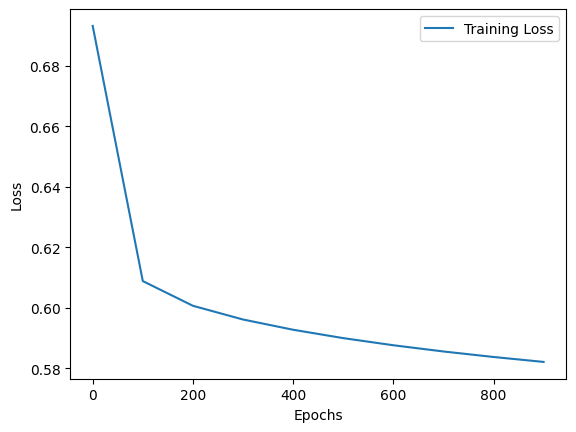

Epoch 0, Loss: 0.693147188703263
Epoch 100, Loss: 0.6068837212978575
Epoch 200, Loss: 0.5979448708865787
Epoch 300, Loss: 0.5932852689161868
Epoch 400, Loss: 0.590036393612678
Epoch 500, Loss: 0.5874920454948142
Epoch 600, Loss: 0.5853753672244261
Epoch 700, Loss: 0.5835532412579788
Epoch 800, Loss: 0.5819518807220706
Epoch 900, Loss: 0.5805253180117503


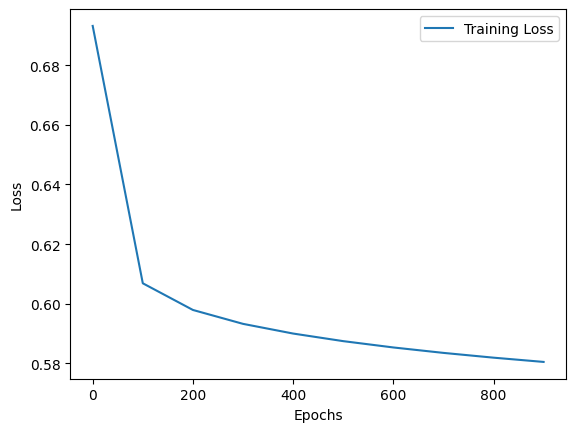

Epoch 0, Loss: 0.693147188703265
Epoch 100, Loss: 0.5874327988979037
Epoch 200, Loss: 0.5771449085684445
Epoch 300, Loss: 0.5717146961771482
Epoch 400, Loss: 0.5679389874735882
Epoch 500, Loss: 0.5649900198025615
Epoch 600, Loss: 0.5625348100977939
Epoch 700, Loss: 0.5604133844854161
Epoch 800, Loss: 0.5585386345275307
Epoch 900, Loss: 0.5568576401222923


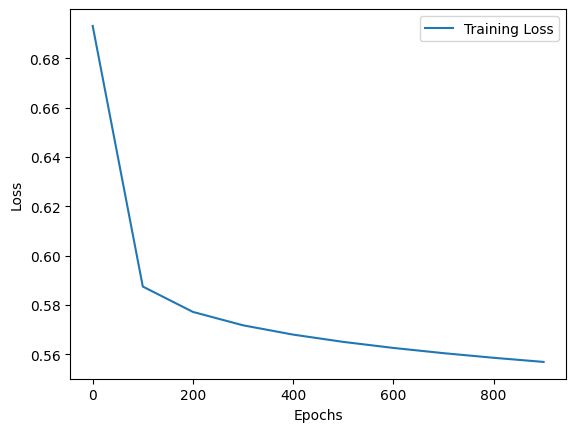

Epoch 0, Loss: 0.6931471886900238
Epoch 100, Loss: 0.610385333371742
Epoch 200, Loss: 0.6021322815620146
Epoch 300, Loss: 0.5977494358701916
Epoch 400, Loss: 0.5946870171142254
Epoch 500, Loss: 0.5922880035732946
Epoch 600, Loss: 0.5902905301221657
Epoch 700, Loss: 0.5885694487765002
Epoch 800, Loss: 0.5870558265804564
Epoch 900, Loss: 0.5857067665416612


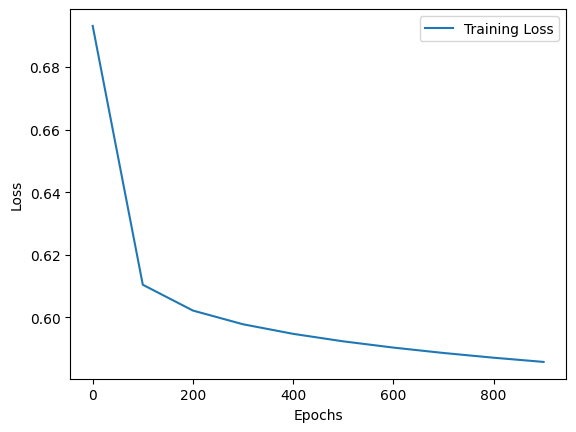

Epoch 0, Loss: 0.6931471886900205
Epoch 100, Loss: 0.6063395026719068
Epoch 200, Loss: 0.5972627314844692
Epoch 300, Loss: 0.5921455731475892
Epoch 400, Loss: 0.5884328367701188
Epoch 500, Loss: 0.5854500878122613
Epoch 600, Loss: 0.5829253992314019
Epoch 700, Loss: 0.5807251919350718
Epoch 800, Loss: 0.5787731188680935
Epoch 900, Loss: 0.5770200333894613


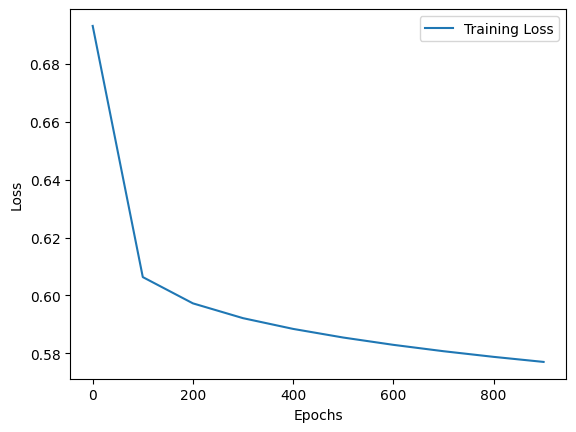

Average Accuracy: 71.62%
Epoch 0, Loss: 0.6931471886900205
Epoch 100, Loss: 0.6063395026719068
Epoch 200, Loss: 0.5972627314844692
Epoch 300, Loss: 0.5921455731475892
Epoch 400, Loss: 0.5884328367701188
Epoch 500, Loss: 0.5854500878122613
Epoch 600, Loss: 0.5829253992314019
Epoch 700, Loss: 0.5807251919350718
Epoch 800, Loss: 0.5787731188680935
Epoch 900, Loss: 0.5770200333894613


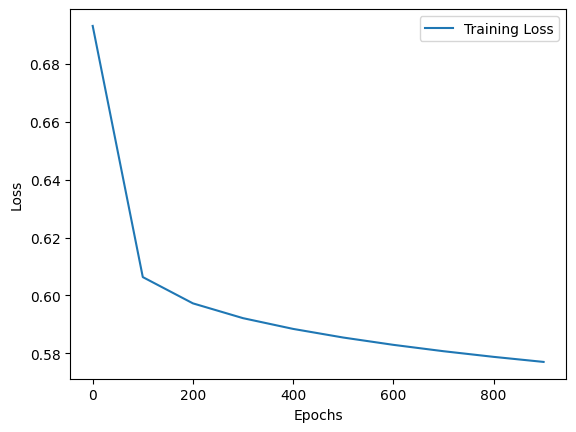

Test Set Accuracy: 79.87%


In [ ]:
accuracies = []

# Perform cross-validation
for train_index, val_index in kf.split(data):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Instantiate the logistic regression model
    model = LogisticRegression(learning_rate=0.01, epochs=1000, regularization_param=0.01)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy across all folds
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')

# Evaluate on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy: {test_accuracy * 100:.2f}%')


**LogisticRegression Class:**
- **Initialization**:
  - `__init__` method initializes the LogisticRegression model with certain parameters.
    - `learning_rate=0.01`: Sets the default learning rate to 0.01, controlling the step size during optimization. Higher values mean larger steps during gradient descent.
    - `epochs=1000`: Sets the default number of epochs (iterations) for training the model. This determines how many times the entire dataset is passed through the model during training.
    - `regularization_param=0.01`: Sets the default regularization parameter to 0.01, which helps prevent overfitting by penalizing large parameter values.

- **Sigmoid Function**:
  - `sigmoid` method calculates the sigmoid function for a given input.
    - The sigmoid function maps any real-valued number to the range (0, 1), which is useful for binary classification problems.

- **Compute Loss Function**:
  - `compute_loss` method calculates the logistic loss function.
    - The loss function measures the difference between the predicted values (`y_pred`) and the actual values (`y`).
    - It computes the logistic loss by summing the negative log-likelihood of the predicted probabilities for each observation.
    - Additionally, it computes the regularization term to penalize large parameter values and control overfitting.
    - The overall loss is the sum of the logistic loss and the regularization term.

- **Compute Gradients Function**:
  - `compute_gradients` method calculates the gradients of the loss function with respect to the parameters.
    - It computes the gradient of the logistic loss function with respect to the parameters (`theta`) using the chain rule and the derivative of the sigmoid function.
    - Additionally, it computes the gradient of the regularization term to regularize the parameters.
    - The gradients are computed using the formula for the gradient of the logistic loss function and the regularization term.

- **Fit Method**:
  - `fit` method trains the logistic regression model using gradient descent with AdaGrad optimization.
    - It initializes the model parameters (`theta`) to zeros and creates an AdaGrad optimizer with the specified learning rate.
    - The method iterates over the specified number of epochs:
      - It computes the predicted values (`y_pred`) using the current parameters (`theta`).
      - It calculates the gradients of the loss function with respect to the parameters (`theta`).
      - It updates the parameters (`theta`) using the AdaGrad optimizer to minimize the loss.
      - It logs the loss at regular intervals during training.
    - Finally, it plots the training loss curve to visualize the model's learning progress over epochs.

- **Predict Method**:
  - `predict` method predicts binary outcomes based on input features.
    - It computes the predicted probabilities (`y_pred`) using the sigmoid function and the model parameters (`theta`).
    - It returns binary predictions based on a threshold of 0.5, where probabilities greater than or equal to 0.5 are classified as positive (1), and those less than 0.5 are classified as negative (0).


Epoch 0, Loss: 0.6931471886900205
Epoch 100, Loss: 0.6063395026719068
Epoch 200, Loss: 0.5972627314844692
Epoch 300, Loss: 0.5921455731475892
Epoch 400, Loss: 0.5884328367701188
Epoch 500, Loss: 0.5854500878122613
Epoch 600, Loss: 0.5829253992314019
Epoch 700, Loss: 0.5807251919350718
Epoch 800, Loss: 0.5787731188680935
Epoch 900, Loss: 0.5770200333894613


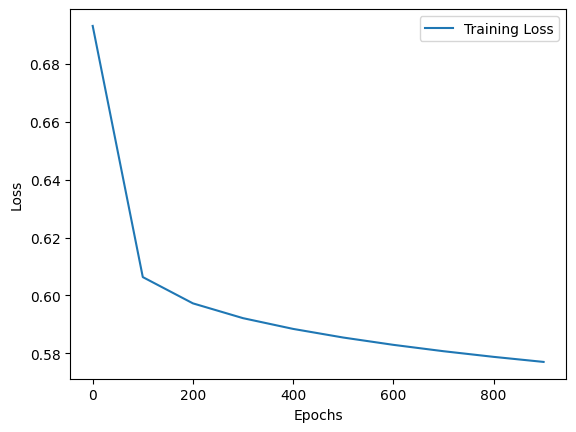

In [ ]:

    # Instantiate the logistic regression model
    model = LogisticRegression(learning_rate=0.01, epochs=1000, regularization_param=0.01)

    # Fit the model to the training data
    model.fit(X_train, y_train)

**Logistic Regression Model Instantiation and Training:**

- **Instantiate the Logistic Regression Model**:
  - `model = LogisticRegression(learning_rate=0.01, epochs=1000, regularization_param=0.01)`: Instantiates the logistic regression model with specified hyperparameters.
    - Sets the learning rate to 0.01, controlling the step size during optimization.
    - Sets the number of epochs to 1000, determining the number of iterations for training.
    - Sets the regularization parameter to 0.01, which helps prevent overfitting.

- **Fit the Model to the Training Data**:
  - `model.fit(X_train, y_train)`: Fits the logistic regression model to the training data.
    - Trains the model using the training features (`X_train`) and labels (`y_train`).
    - During training, the model optimizes its parameters to minimize the loss function and improve predictive performance.
    - The optimization process occurs over multiple epochs, with the model updating its parameters iteratively to reduce the training loss.
    - After training, the model is ready to make predictions on new data.


**The observations for the Loss Curve curve:**

- **Steep Initial Decline:** There is a **sharp drop** in the **loss** within the **first 100 epochs**, indicating that the **model** is **learning quickly** and **effectively** adjusting its **parameters**.

- **Consistent Decrease:** The **loss** continues to **decrease steadily**, though at a **slower rate**, as the **epochs progress**. This **steady decline** suggests that the **model** is **continuing to learn** and **refine its parameters** without **major oscillations** or **instability**.

- **Smoothing Out:** The **curve flattens out** towards the **later epochs**, indicating that the **model** is **converging towards** a **minimum loss**. This is a **good sign** as it suggests the **model** is **approaching optimal performance**.

- **Final Loss Value:** The **final loss value** appears to be around **0.57**, which is **lower than** the **initial value**, showing that the **training process** has **reduced the loss effectively**.

**Overall**, this **loss curve** is **indicative of** a **good training process**. The **model** is **learning quickly initially** and then **refining its performance steadily**, leading to **convergence**. The **steady and consistent decrease** without **major fluctuations** is a **positive sign** of the **training's effectiveness**.


##**EVALUATION OF THE MODEL**

In [ ]:
# Final prediction and evaluation
from sklearn.metrics import accuracy_score, precision_score
final_predictions = model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions)
print(f'Final Accuracy: {final_accuracy * 100:.2f}%')
print(f'Final Precision: {final_precision* 100:.2f}%')


Final Accuracy: 79.87%
Final Precision: 81.58%


In [ ]:
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, final_predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

Confusion Matrix:
[[92  7]
 [24 31]]


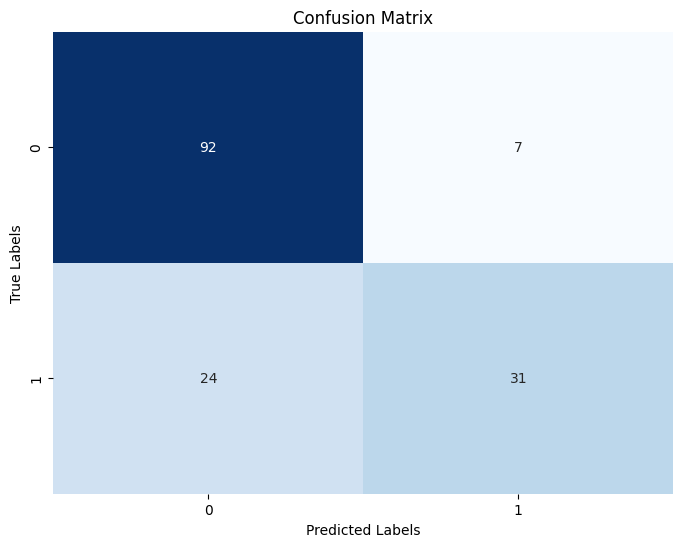

In [ ]:
# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
loaded_model = joblib.load('logistic_regression_model.pkl')